**Data Bootcamp Project**  
**Lu Maw Aung, Patrick Merrick**  
**An Analysis of NYC 311 Service Requests from 2010/16**  
**May 12, 2016**

>### 311 is New York City's main source of government information and non-emergency services. Whether you're a resident, business owner, or visitor, help is just a click, text, or call away.  
*NYC 311 Website*

##### Forward  
This report discusses the findings from an analysis performed on NYC 311 Service Request data, available at NYC Open Data [https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9]. The data available online has numerous features that can be easily modified. We chose to work only with features that related to location, time, complaint type, and resolution to make the data size more manageable.  
Throughout this report, we will describe trends and patterns that we observe through analyzing each feature. The overall organization of this report is also chronological, as each analysis will be broken down by year. Doing so, we hope to show not only year-specific issues and patterns, but overall progress and change of the NYC 311 service from 2010-2016. 

##### Reading-In the File  
First we must read in the data. Please input the file directory where you downloaded our zipped file into the '...' section below. 

In [1]:
import pandas as pd
url1='...'
url2='/Aung-Merrick-NYC311Requests/DataBootcamp311Data.csv'
url= url1+url2
data= pd.read_csv(url)

/Users/lma/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Below is an overview of the features and variables we will be working with. As stated above, the features selected are related to the complaint/issue, the resolution status, the location of the service request, and the time. 

In [2]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Incident Zip', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Latitude',
       'Longitude'],
      dtype='object')

The next step is to clean and manipulate the data a bit so that it is in a format we can work with easily. As we want to split the data by year, we decided to change the 'Created Date' and 'Closed Date' features into a datetime series. The request Creation Date goes back to 2010. We created a new dataframe for each year based on their creation dates.  
  
Closed Date has some records with float variables but these records are held in place with a Jan 1, 1990, as seen below. This will be explained later in the Closed Date-Created Date Range section, but the main reason for doing this is because that is the closed date of records we will be ignoring in our Closed Date-Created Date  range analysis.

In [3]:
closed_date = []
for x in data['Closed Date']:
    if type(x) == float:
        closed_date.append('01/01/1990')
    else:
        closed_date.append(x.rsplit()[0])
data['Closed Date'] = closed_date
data['Closed Date'] = pd.to_datetime(data['Closed Date'], format = "%m/%d/%Y")

created_date = []
for i in data['Created Date']:
     created_date.append(i.rsplit()[0])
data['Created Date'] = created_date
data['Created Date']= pd.to_datetime(data['Created Date'],format = "%m/%d/%Y")


data2016= data[data['Created Date'] >= pd.datetime(2016,1,1)]

data2015 = data[data['Created Date'] >= pd.datetime(2015,1,1)]
data2015 = data2015[data2015['Created Date'] < pd.datetime(2016,1,1)]

data2014 = data[data['Created Date'] >= pd.datetime(2014,1,1)]
data2014 = data2014[data2014['Created Date'] < pd.datetime(2015,1,1)]

data2013 = data[data['Created Date'] >= pd.datetime(2013,1,1)]
data2013 = data2013[data2013['Created Date'] < pd.datetime(2014,1,1)]

data2012 = data[data['Created Date'] >= pd.datetime(2012,1,1)]
data2012 = data2012[data2012['Created Date'] < pd.datetime(2013,1,1)]

data2011 = data[data['Created Date'] >= pd.datetime(2011,1,1)]
data2011 = data2011[data2011['Created Date'] < pd.datetime(2012,1,1)]

data2010 = data[data['Created Date'] >= pd.datetime(2010,1,1)]
data2010 = data2010[data2010['Created Date'] < pd.datetime(2011,1,1)]

##### The Requests 
First we will examine the nature of these 311 requests each year, in terms of the number of requests, the most common issues, and the agencies that received the most requests. This will allow us to compare these requests by year.  
  
First, we must import matplotlib packages to plot our findings.

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


We analyze 311 requests in terms of total number of requests received per year.

      Number_of_Requests
Year                    
2010             1754354
2011             1688090
2012             1568421
2013             1614207
2014             1839573
2015             2021774
2016              691232


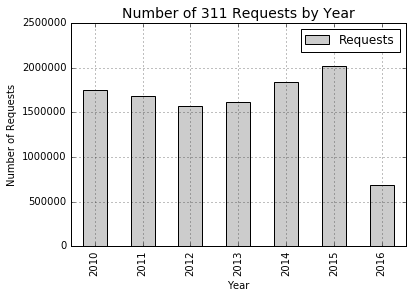

In [5]:
numberofrequests = pd.DataFrame()
numberofrequests['Year'] = ['2010','2011','2012','2013','2014','2015','2016']
requests = []
x = [data2010,data2011,data2012,data2013,data2014,data2015,data2016]
for i in x:
    requests.append(len(i))
numberofrequests['Number_of_Requests'] = requests
numberofrequests= numberofrequests.set_index('Year')

fig, ax = plt.subplots()
numberofrequests.plot(ax=ax, kind='bar', color='0.8', grid=True)
ax.set_title('Number of 311 Requests by Year', size=14)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Requests')
ax.legend(['Requests'], loc=0)
print(numberofrequests)

**Number of Requests**  
In terms of quantity, 2015 was the busiest year with over 2 million 311 requests. 2016 has data for up to April, so the approximately 700,000 requests already in so far can be estimated to be a third of this year's total. Overall, the number of requests appear fairly consistent throughout, although the past 3 years have seen a steady growth.
  
  
**Complaint Type**  
There are over a hundred complaint types filed each year, from issues as common as heating, to as random as 'Squeegee' and 'Literature Request'(Sorry. This report does not attempt to explore what a Squeegee is). Therefore, we decided to look only at the top 5 most common 311 requests each year. The code below constructs a multi-index dataframe for the top 5 issues each year.

In [6]:
complaintquantity = []
complainttype = [[],[]]

for x in range(2010,2017):
    if x == 2010:
        i = data2010
    if x == 2011:
        i = data2011
    if x == 2012:
        i = data2012
    if x == 2013:
        i = data2013
    if x == 2014:
        i = data2014
    if x == 2015:
        i = data2015
    if x == 2016:
        i = data2016
    for z in range(0,5):
        complainttype[0].append(x)
        complainttype[1].append(i['Complaint Type'].value_counts().head(5).index[z])
        complaintquantity.append(i['Complaint Type'].value_counts().head(5)[z])
complainttype = list(zip(*complainttype))
complainttypeindex = pd.MultiIndex.from_tuples(complainttype, names= ['Year', 'Top 5 Issues'])  
complaintsdf = pd.DataFrame(index=complainttypeindex)

complaintsdf['Quantity'] = complaintquantity


Now, we plot this dataframe by year. The graph below shows the top 5 issues by quantity each year. It is also color-coded by the complaint type.

/Users/lma/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


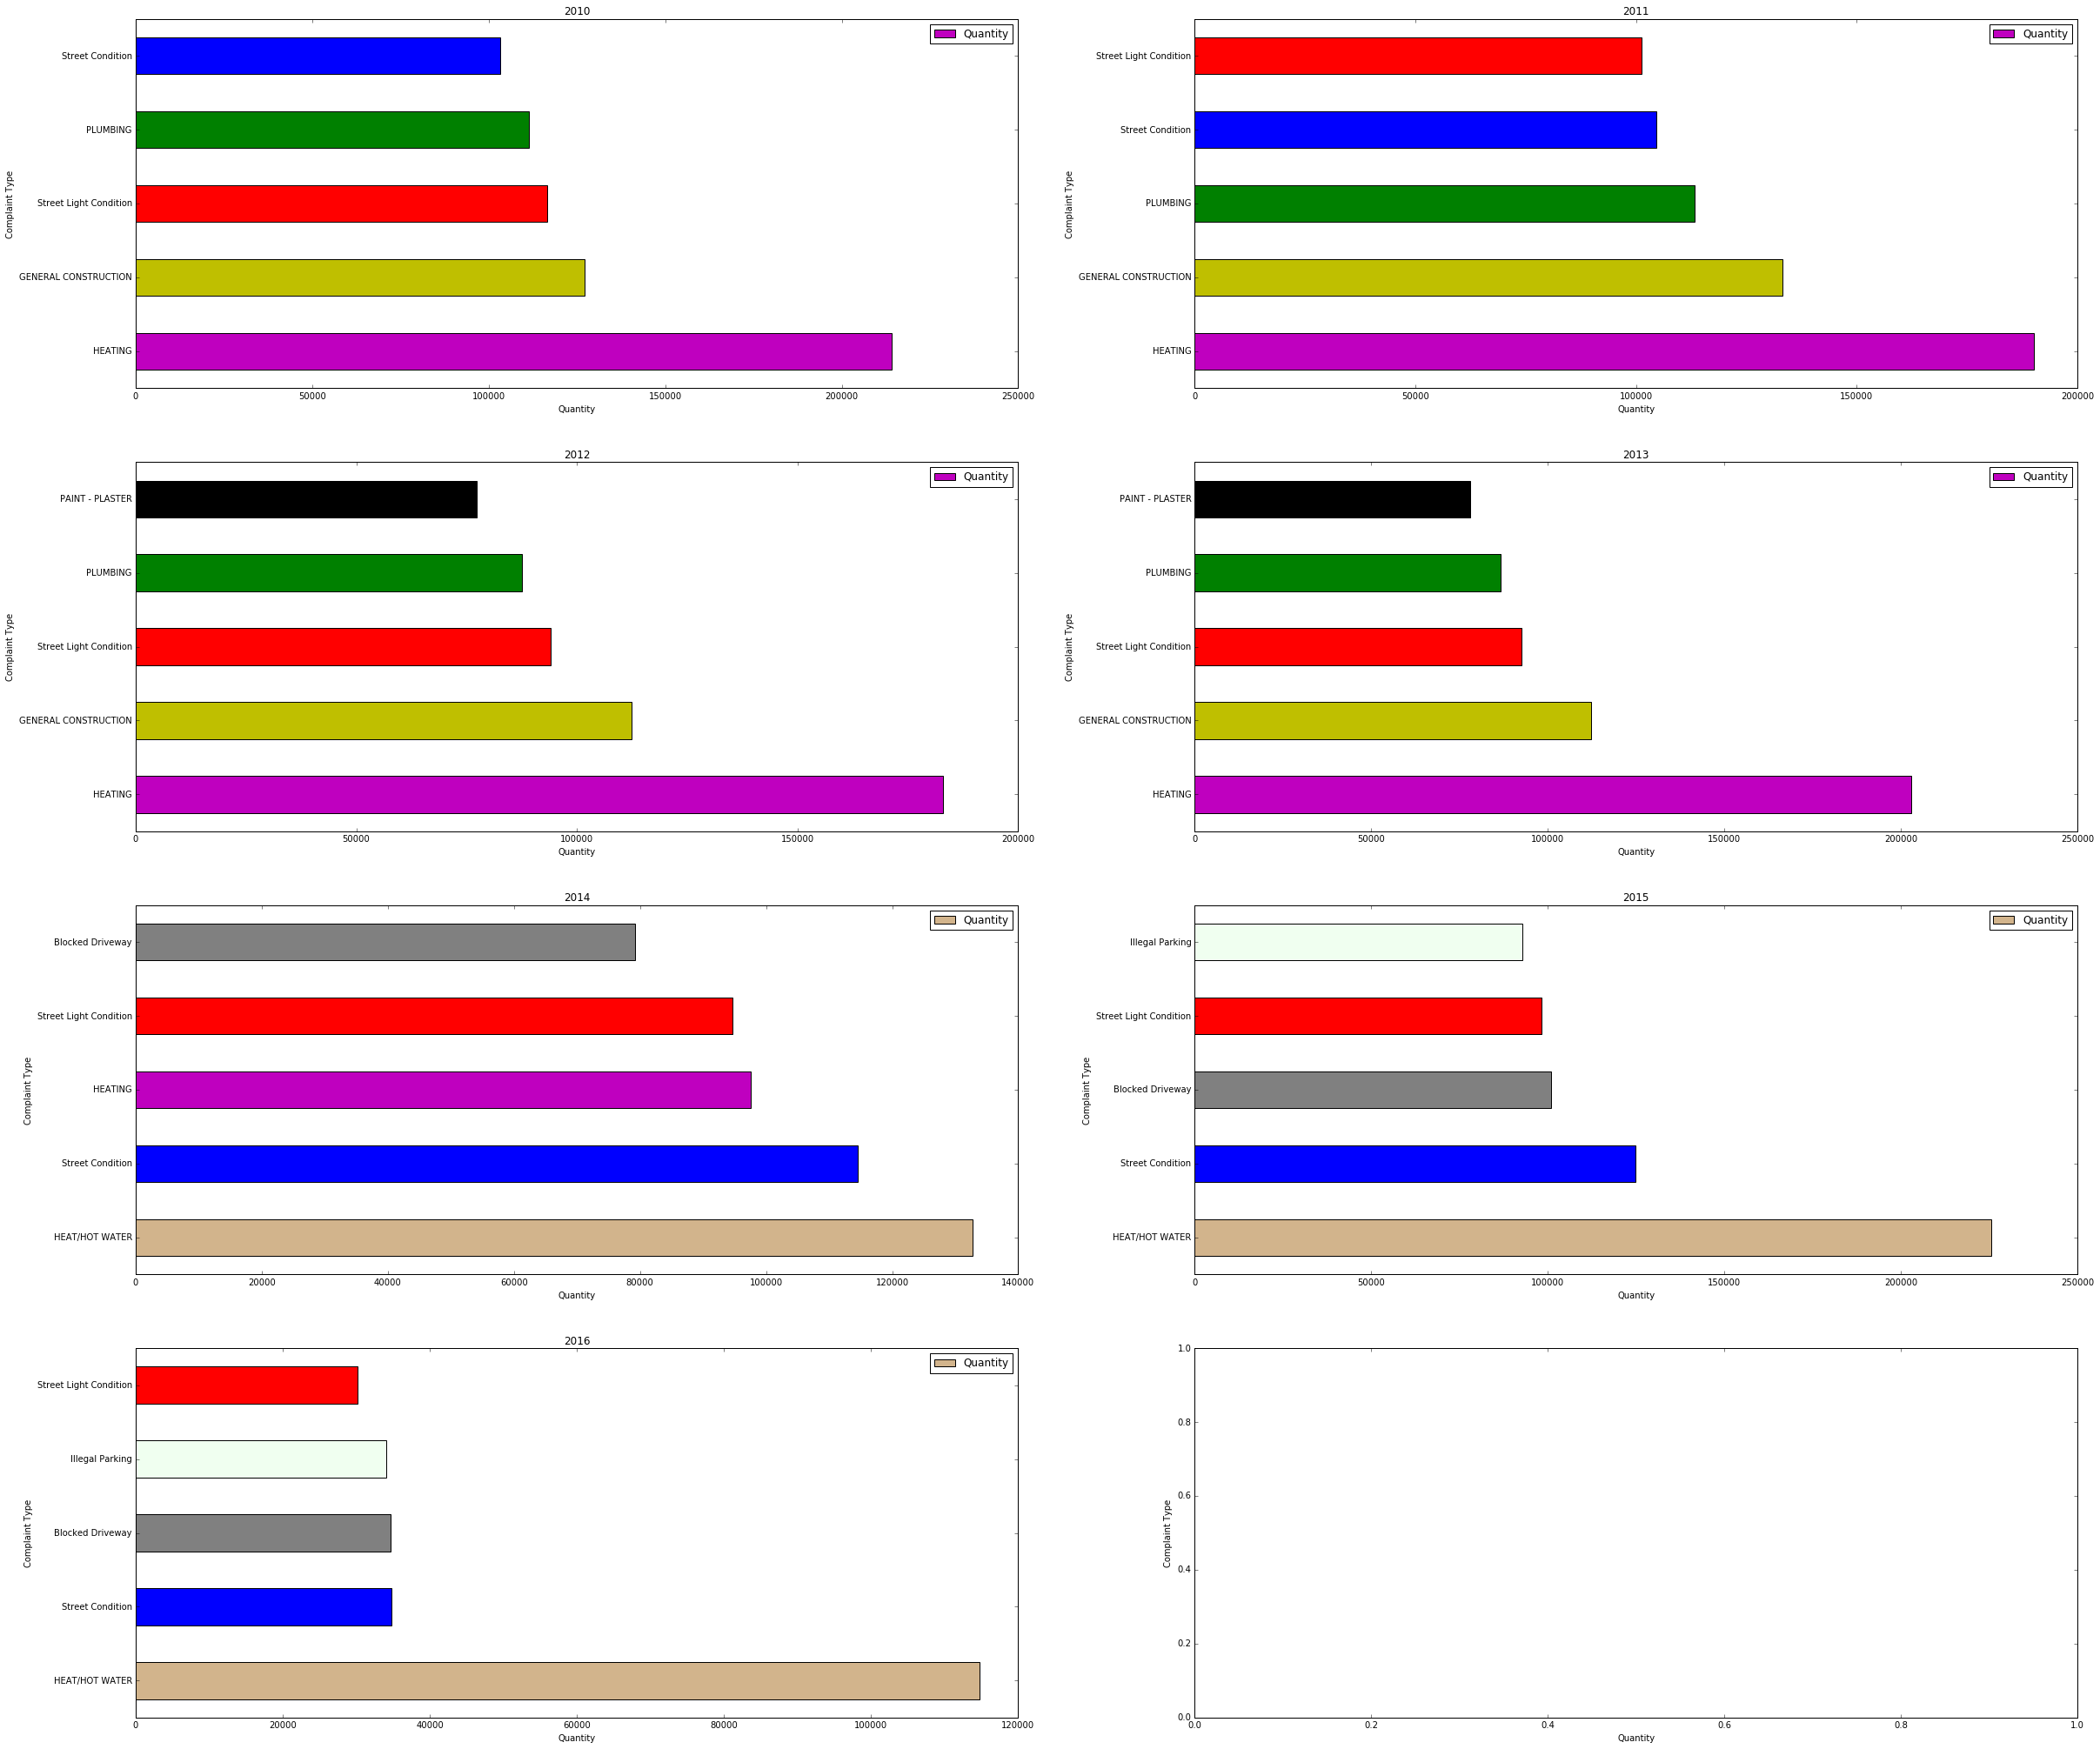

In [7]:
fig, ax = plt.subplots(4, 2, figsize=(40,35))

complaintsdf.xs(2010, level='Year').plot(kind='barh', ax=ax[0, 0], color=['m','y','r','g', 'b'] , title='2010')
complaintsdf.xs(2011, level='Year').plot(kind='barh', ax=ax[0, 1], color=['m','y','g','b', 'r'], title='2011')
complaintsdf.xs(2012, level='Year').plot(kind='barh', ax=ax[1, 0], color=['m','y','r','g', 'black'], title='2012')
complaintsdf.xs(2013, level='Year').plot(kind='barh', ax=ax[1, 1], color=['m','y','r','g', 'black'], title='2013')
complaintsdf.xs(2014, level='Year').plot(kind='barh', ax=ax[2, 0], color=['tan','b','m','r', 'gray'], title='2014')
complaintsdf.xs(2015, level='Year').plot(kind='barh', ax=ax[2, 1], color=['tan','b','gray','r', 'honeydew'], title='2015')
complaintsdf.xs(2016, level='Year').plot(kind='barh', ax=ax[3, 0], color=['tan','b','gray','honeydew', 'r'], title='2016')

for i in range(0,4):
    for x in range(0,2):
        ax[i, x].set_xlabel('Quantity')
        ax[i,x].set_ylabel('Complaint Type')
        ax[i,x].legend()


As seen in the bar graphs above, there are recurring common issues throughout 2010-2016. Street Light Condition, Street Condition, and Heating are some of the most common issues. These complaint types were the top 5 complaints by quantity in at least 5 of the 7 years.  
  
**By Agency**  
The agencies that receive the most 311 requests are much more consisent throughout this time horizon. From 2010 to 2016, the same 5 agencies received the most complaints. This is illustrated below. Again, we first prepare the data, then graph it.

In [8]:
agencyquantity = []
agencytype = [[],[]]

for x in range(2010,2017):
    if x == 2010:
        i = data2010
    if x == 2011:
        i = data2011
    if x == 2012:
        i = data2012
    if x == 2013:
        i = data2013
    if x == 2014:
        i = data2014
    if x == 2015:
        i = data2015
    if x == 2016:
        i = data2016
    for z in range(0,5):
        agencytype[0].append(x)
        agencytype[1].append(i['Agency'].value_counts().head(5).index[z])
        agencyquantity.append(i['Agency'].value_counts().head(5)[z])
agencytype = list(zip(*agencytype))
agencytypeindex = pd.MultiIndex.from_tuples(agencytype, names= ['Year', 'Top 5 Agencies'])  
agencydf = pd.DataFrame(index=agencytypeindex)
agencydf['Quantity'] = agencyquantity


/Users/lma/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


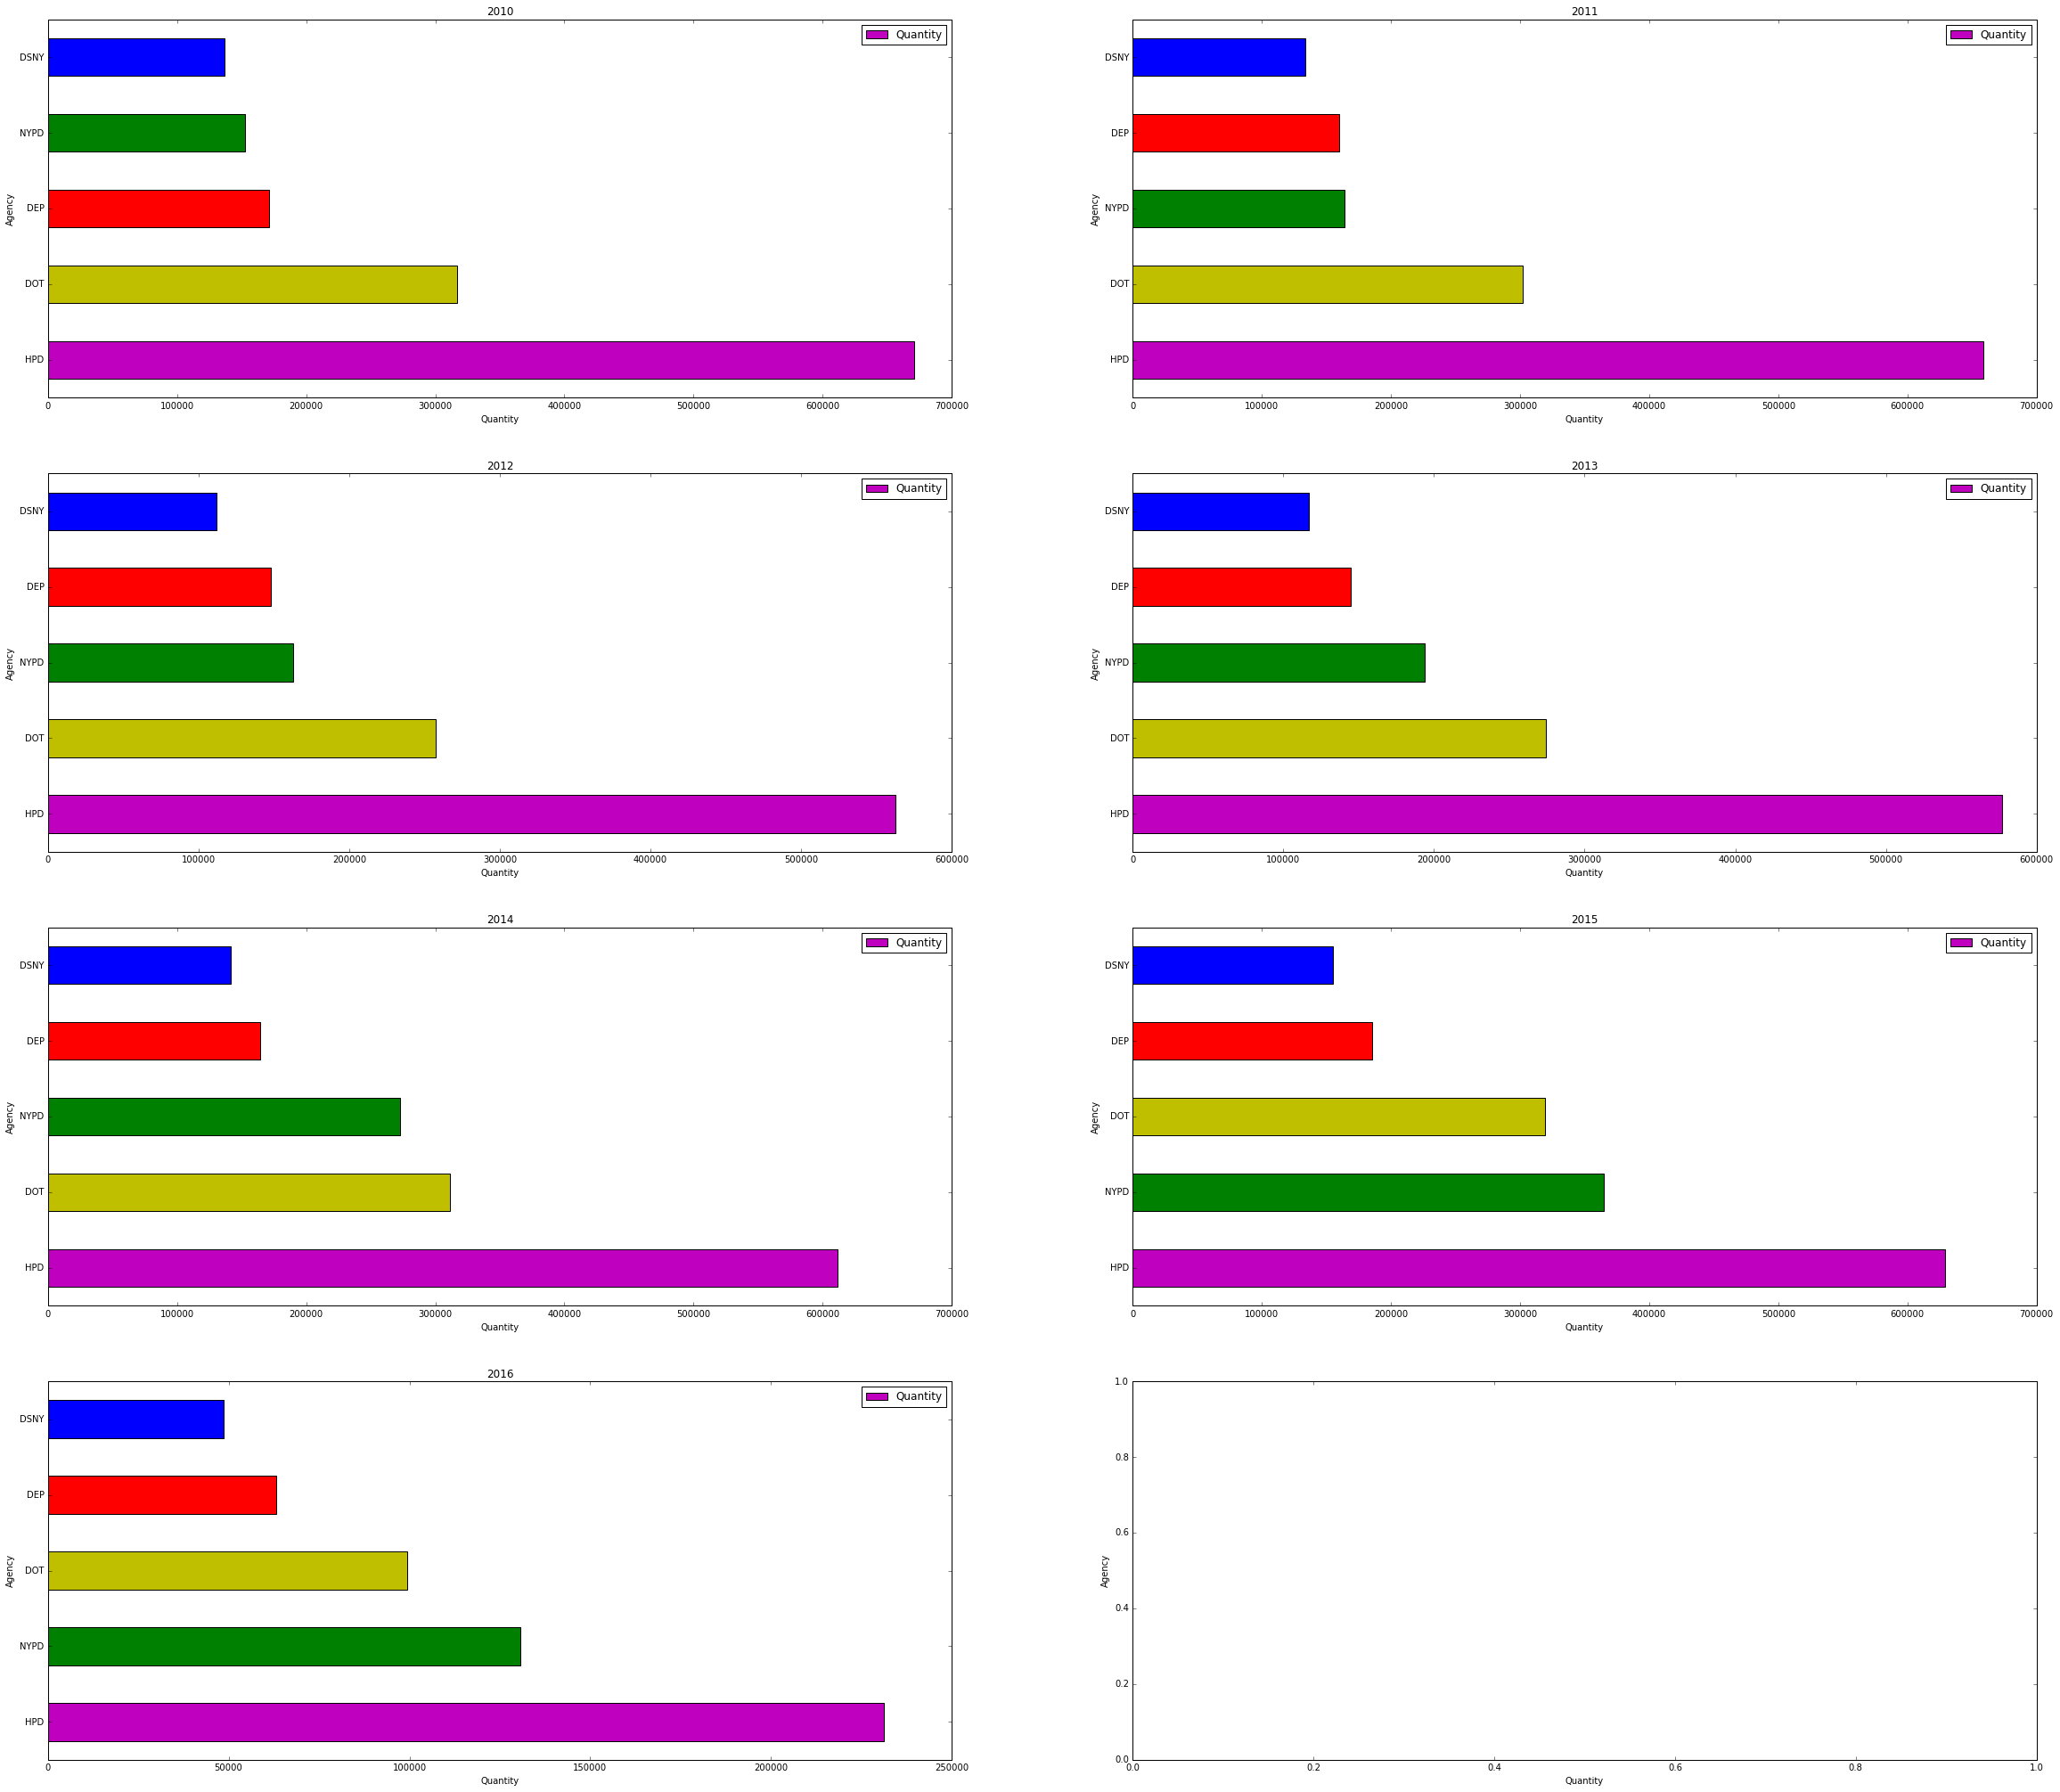

In [9]:
fig, axe = plt.subplots(4, 2, figsize=(40,35))

agencydf.xs(2010, level='Year').plot(kind='barh', ax=axe[0, 0], color=['m','y','r','g', 'b'] , title='2010')
agencydf.xs(2011, level='Year').plot(kind='barh', ax=axe[0, 1], color=['m','y','g','r', 'b'], title='2011')
agencydf.xs(2012, level='Year').plot(kind='barh', ax=axe[1, 0], color=['m','y','g','r', 'b'], title='2012')
agencydf.xs(2013, level='Year').plot(kind='barh', ax=axe[1, 1], color=['m','y','g','r', 'b'], title='2013')
agencydf.xs(2014, level='Year').plot(kind='barh', ax=axe[2, 0], color=['m','y','g','r', 'b'], title='2014')
agencydf.xs(2015, level='Year').plot(kind='barh', ax=axe[2, 1], color=['m','g','y','r', 'b'], title='2015')
agencydf.xs(2016, level='Year').plot(kind='barh', ax=axe[3, 0], color=['m','g','y','r', 'b'], title='2016')

for i in range(0,4):
    for x in range(0,2):
        axe[i, x].set_xlabel('Quantity')
        axe[i,x].set_ylabel('Agency')
        axe[i,x].legend()



The agencies are stated as acronyms. The key for this can be generated by running the code below.

In [10]:
agencykey= {'DSNY':'Department of Sanitation New York', 'NYPD': 'New York Police Department', 
            'DEP':'Department of Environmental Protection', 'DOT': 'Department of Transportation',
            'HPD': 'NYC Housing Presevation and Development'}
for i in agencykey.keys():
    print(i + " stands for " + agencykey[i])

DSNY stands for Department of Sanitation New York
DEP stands for Department of Environmental Protection
HPD stands for NYC Housing Presevation and Development
NYPD stands for New York Police Department
DOT stands for Department of Transportation


##### Analyzing Resolution Effectiveness
A key question we are trying to explore in this project is how effectively these 311 requests get resolved. Below, we outline resolution details by year. Our key variable of interest in exploring resolution effectiveness is **Status**.  
In **Status**, we are specifically looking for 'Closed' status. This is assigned for a variety of reasons: no violations were found, complaint has been addressed, complaint is deferred, etc... Other status like 'Assigned' and 'Open' have violations that are being addressed or in progress. Overall, Closed gives a good idea of requests that at least **get a response.** Other statuses also seem to show progress towards resolve.  
  
>*Issues with Our Target Variable:*  
There are some issues with our target variable that affects our analysis. The 'Closed' status can be inflated if requests are simply deferred instead of being addressed. When these agencies cannot address the resolution because of reasons like tenants not being home or building not being reachable, they close the complaint. This can also affect our analysis as requests are not really being addressed, but only acknowledged. Nevertheless, we believe the Status feature still gives a good analysis of the agencies' response, regardless of what the response is. With the data we are working with, this is the best we can do.  


Below, we graph the percentage of complaints that were closed each year.

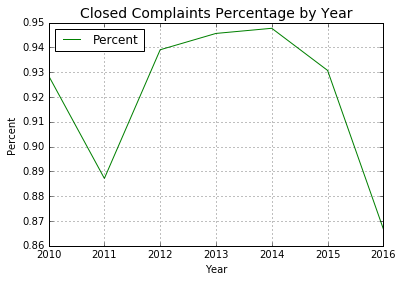

In [11]:
closedcomplaints= []
totalcomplaints=[]
dataframes= [data2010,data2011,data2012,data2013,data2014,data2015,data2016]
for i in dataframes:
    closedcomplaints.append(i['Status'].value_counts()[0])
    totalcomplaints.append(len(i))
closeddf = pd.DataFrame()
closeddf['Closed'] = closedcomplaints
closeddf['Total'] = totalcomplaints
percent = []
for i in range(len(closeddf)):
    percent.append(closeddf['Closed'][i]/closeddf['Total'][i])
closeddf['Percent'] = percent
closeddf['Year'] = ['2010', '2011', '2012', '2013', '2014', '2015', '2016']
closeddf = closeddf.set_index('Year')

fig, ax1 = plt.subplots()
closeddf['Percent'].plot(ax=ax1, kind='line', color='g', grid=True)
ax1.set_title('Closed Complaints Percentage by Year', size=14)
ax1.set_xlabel('Year')
ax1.set_ylabel('Percent')
ax1.legend(['Percent'], loc=0)

**Complaint Closed Rate**  
2014 was the year with the highest closed complaints rate, and 2011, the lowest. 2016 is currently lower, but since the year is still in progression, it is unfair to evaluate performance based on the 4 months.  
  
**Closed Date-Created Date Range**  
As stated earlier, a main issue with using Closed status is the clouded results we get with deferred or unaddressed requests. That is why we thought another metric to judge resolution efficiency could be the spread between the closed date and created date. The code below explores this.  
>*Issue:* For some reason, smoking complaints have a closed date of 1900-01-01 in all years. Therefore, we chose to ignore these specific records in calculating our close date-created date time spread, in addition to the other records we fixed earlier at the start of this report.

  

The code below resets the index for each dataframe, and for each record with a closed status in the dataframe, adds the time difference between the Closed Date and Created Date to a new list. Then a new timedelta variable of 0 days is created. For every time difference value in the new list with a value of greater than 0 days, we add the time delta to the new variable. This gives us the total Closed Date-Created Date time spread per year.  
  
This code is a little time-intensive, so each year is partitioned into its own section. The average Closed Date-Created Date range (total time spread / total number of closed complaints) is also provided right below already if you wish to skip this part due to time constraints.

      Average Closed-Created Time
Year                             
2010                         5653
2011                         4995
2012                         6226
2013                         6013
2014                         5289
2015                         4897
2016                        15394


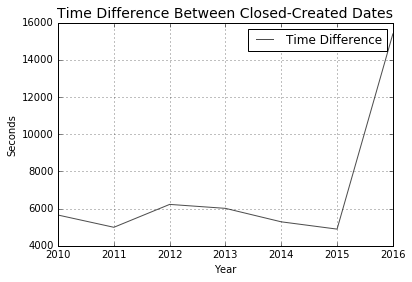

In [24]:
secondsrange = pd.DataFrame()
secondsrange['Year'] = ['2010','2011','2012','2013','2014','2015','2016']
secondsrange['Average Closed-Created Time'] = [5653, 4995, 6226, 6013,5289,4897, 15394]
secondsrange = secondsrange.set_index('Year')

fig, ax2 = plt.subplots()
secondsrange.plot(ax=ax2, kind='line', color='0.3', grid=True)
ax2.set_title('Time Difference Between Closed-Created Dates', size=14)
ax2.set_xlabel('Year')
ax2.set_ylabel('Seconds')
ax2.legend(['Time Difference'], loc=0)
print(secondsrange)

As you can see, it takes approximately an hour for a complaint to be addressed and closed. This is consistent throughout 2010-2015. 2016 sees a much higher average time difference of about 4 hours currently. This can give us some potential insights. For example, complaints get closed quicker towards the later part of the year. Another possible reason is 2016 is going less efficiently than the previous years as well.  
  
The proof of work is shown below.  
 
Overall, 311 appears to be a non-emergency service that has had very similar issues and complaints over the past five years. The recurring issues like heating/cooling and street conditions show how these aspects should be developed. The fact that the same five agencies deal with the most requests each year can influence government's resource allocation decisions. The closed rate and resolution analysis reveal that 311 is good at responding and addressing complaints. Moving forward, we believe this report can be improved if we can further classify and analyze the Status and Resolution Description features to understand the nature of these complaint resolutions better.

In [11]:
data2010 = data2010.reset_index()
daterange2010 = []
for a in range(len(data2010)):
    if data2010['Status'][a] == 'Closed':
        daterange2010.append(data2010['Closed Date'][a] - data2010['Created Date'][a])
daysgap2010 = pd.Timedelta(days=0)
for i in range(len(daterange2010)):
    if daterange2010[i] < pd.Timedelta(days=0):
        daterange2010[i] = pd.Timedelta(days=0)
        daysgap2010= daysgap2010 + daterange2010[i]
    else:
        daysgap2010= daysgap2010 + daterange2010[i] 

OverflowError: Python int too large to convert to C long

In [12]:
data2011 = data2011.reset_index()
daterange2011 = []
for a in range(len(data2011)):
    if data2011['Status'][a] == 'Closed':
        daterange2011.append(data2011['Closed Date'][a] - data2011['Created Date'][a])
daysgap2011 = pd.Timedelta(days=0)
for i in range(len(daterange2011)):
    if daterange2011[i] < pd.Timedelta(days=0):
        daterange2011[i] = pd.Timedelta(days=0)
        daysgap2011= daysgap2011 + daterange2011[i]
    else:
        daysgap2011= daysgap2011 + daterange2011[i] 

OverflowError: Python int too large to convert to C long

In [14]:
data2012 = data2012.reset_index()
daterange2012 = []
for a in range(len(data2012)):
    if data2012['Status'][a] == 'Closed':
        daterange2012.append(data2012['Closed Date'][a] - data2012['Created Date'][a])
daysgap2012 = pd.Timedelta(days=0)
for i in range(len(daterange2012)):
    if daterange2012[i] < pd.Timedelta(days=0):
        daterange2012[i] = pd.Timedelta(days=0)
        daysgap2012= daysgap2012 + daterange2012[i]
    else:
        daysgap2012= daysgap2012 + daterange2012[i]
        






OverflowError: Python int too large to convert to C long

In [ ]:
data2013 = data2013.reset_index()
daterange2013 = []
for a in range(len(data2013)):
    if data2013['Status'][a] == 'Closed':
        daterange2013.append(data2013['Closed Date'][a] - data2013['Created Date'][a])
daysgap2013= pd.Timedelta(days=0)
for i in range(len(daterange2013)):
    if daterange2013[i] < pd.Timedelta(days=0):
        daterange2013[i] = pd.Timedelta(days=0)
        daysgap2013= daysgap2013 + daterange213[i]
    else:
        daysgap2013= daysgap2013 + daterange2013[i] 

In [ ]:
data2014 = data2014.reset_index()
daterange2014 = []
for a in range(len(data2014)):
    if data2014['Status'][a] == 'Closed':
        daterange2014.append(data2014['Closed Date'][a] - data2014['Created Date'][a])
daysgap2014= pd.Timedelta(days=0)
for i in range(len(daterange2014)):
    if daterange2014[i] < pd.Timedelta(days=0):
        daterange2014[i] = pd.Timedelta(days=0)
        daysgap2014= daysgap2014 + daterange2014[i]
    else:
        daysgap2014= daysgap2014 + daterange2014[i] 

In [ ]:
data2015 = data2015.reset_index()
daterange2015 = []
for a in range(len(data2015)):
    if data2015['Status'][a] == 'Closed':
        daterange2015.append(data2015['Closed Date'][a] - data2015['Created Date'][a])
daysgap2015= pd.Timedelta(days=0)
for i in range(len(daterange2015)):
    if daterange2015[i] < pd.Timedelta(days=0):
        daterange2015[i] = pd.Timedelta(days=0)
        daysgap2015= daysgap2015 + daterange2015[i]
    else:
        daysgap2015= daysgap2015 + daterange2015[i] 



In [ ]:
data2016 = data2016.reset_index()
daterange2016 = []
for a in range(len(data2016)):
    if data2016['Status'][a] == 'Closed':
        daterange2016.append(data2016['Closed Date'][a] - data2016['Created Date'][a])
daysgap2016= pd.Timedelta(days=0)
for i in range(len(daterange2016)):
    if daterange2016[i] < pd.Timedelta(days=0):
        daterange2016[i] = pd.Timedelta(days=0)
        daysgap2016= daysgap2016 + daterange2016[i]
    else:
        daysgap2016= daysgap2016 + daterange2016[i] 

In [107]:
print(daysgap2010/len(daterange2010))
print(daysgap2011/len(daterange2011))
print(daysgap2012/len(daterange2012))
print(daysgap2013/len(daterange2013))
print(daysgap2014/len(daterange2014))
print(daysgap2015/len(daterange2015))
print(daysgap2016/len(daterange2016))

0 days 01:34:12.734954
0 days 01:23:15.168741
0 days 01:43:46.169282
0 days 01:40:12.708703
0 days 01:28:09.241665
0 days 01:21:36.869491
0 days 04:16:34.023393
